### COMP 3610 Project

In [46]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler as scaler
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

In [47]:
df = pd.read_csv('Solar Dataset.csv')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Day of Year                           2920 non-null   int64  
 1   Year                                  2920 non-null   int64  
 2   Month                                 2920 non-null   int64  
 3   Day                                   2920 non-null   int64  
 4   First Hour of Period                  2920 non-null   int64  
 5   Is Daylight                           2920 non-null   bool   
 6   Distance to Solar Noon                2920 non-null   float64
 7   Average Temperature (Day)             2920 non-null   int64  
 8   Average Wind Direction (Day)          2920 non-null   int64  
 9   Average Wind Speed (Day)              2920 non-null   float64
 10  Sky Cover                             2920 non-null   int64  
 11  Visibility       

Removing null entries and converting bool column to int.

In [49]:
df = df.dropna(how = 'any', axis =0)
df['Is Daylight'] = df['Is Daylight'].astype(int)
#df= df.drop(['Day of Year', 'Year', 'Month', 'Day'], axis=1)

Creating synthetic data using KKN Regressor

In [50]:
required_size = 5000
current_size = df.shape[0]
extra_needed = required_size - current_size

# Separate features and target variable
X = df.drop(columns=["Power Generated"])  # Features
y = df["Power Generated"]  # Target

# Train KNN Regressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X, y)

# Generate synthetic samples
synthetic_X = []
synthetic_y = []

for _ in range(extra_needed):
    idx = np.random.randint(0, current_size)  # Pick a random real sample
    real_sample = X.iloc[idx].to_frame().T  # Keeps feature names
    synthetic_sample = knn.predict(real_sample)  # Predict new value
    synthetic_X.append(real_sample.values[0])  
    synthetic_y.append(synthetic_sample[0])

# Convert synthetic data to DataFrame
df_synthetic = pd.DataFrame(synthetic_X, columns=X.columns)
df_synthetic["Power Generated"] = synthetic_y

# Combine with original dataset
df_extended = pd.concat([df, df_synthetic], ignore_index=True)


# Print dataset sizes
print(f"Original dataset size: {current_size}")
print(f"New dataset size: {df_extended.shape[0]}")

Original dataset size: 2919
New dataset size: 5000


In [51]:
df_extended.to_csv('New Dataset')

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
X = df.drop(columns=["Power Generated"])
y = df["Power Generated"]

X_ext = df_extended.drop(columns=["Power Generated"])
y_ext = df_extended["Power Generated"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train_ext, X_test_ext, y_train_ext, y_test_ext = train_test_split(X_ext, y_ext, test_size=0.2)

# Train the model on both datasets
model_real = RandomForestRegressor()
model_real.fit(X_train, y_train)

model_extended = RandomForestRegressor()
model_extended.fit(X_train_ext, y_train_ext)

# Make predictions
y_pred_real = model_real.predict(X_test)
y_pred_extended = model_extended.predict(X_test_ext)

# Compute SSE (Sum of Squared Errors)
sse_real = np.sum((y_test - y_pred_real) ** 2)
sse_extended = np.sum((y_test_ext - y_pred_extended) ** 2)

# Compute MSE (Mean Squared Error)
mse_real = mean_absolute_error(y_test, y_pred_real)
mse_extended = mean_absolute_error(y_test_ext, y_pred_extended)

# Print results
print(f"Original Data SSE: {sse_real:.4f}")
print(f"Extended Data SSE: {sse_extended:.4f}")
print(f"Original Data MSE: {mse_real:.4f}")
print(f"Extended Data MSE: {mse_extended:.4f}")

Original Data SSE: 3607593877.4179
Extended Data SSE: 11051942881.8017
Original Data MSE: 1230.8671
Extended Data MSE: 1878.3668


In [53]:
import matplotlib.pyplot as plt 
import seaborn as sns

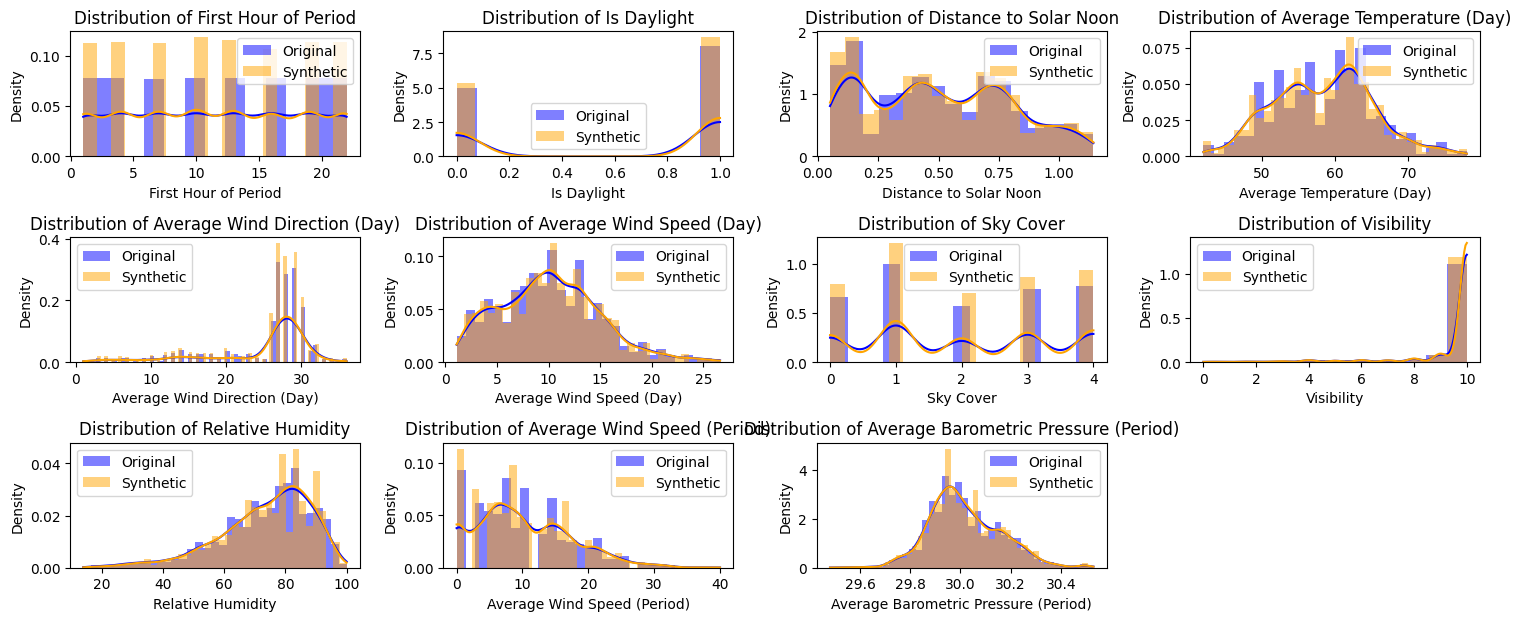

In [54]:
feature_columns = [
   "First Hour of Period", "Is Daylight",
    "Distance to Solar Noon", "Average Temperature (Day)", "Average Wind Direction (Day)", 
    "Average Wind Speed (Day)", "Sky Cover", "Visibility", "Relative Humidity", 
    "Average Wind Speed (Period)", "Average Barometric Pressure (Period)"
]

# Plot histograms for each feature to compare distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(feature_columns, 1):
    plt.subplot(5, 4, i)
    sns.histplot(df[col], kde=True, color='blue', label='Original', stat='density', linewidth=0)
    sns.histplot(df_extended[col], kde=True, color='orange', label='Synthetic', stat='density', linewidth=0)
    plt.title(f'Distribution of {col}')
    plt.legend()

plt.tight_layout()
plt.show()

In [52]:
df_sorted = df_extended.sort_values(by="Day of Year")

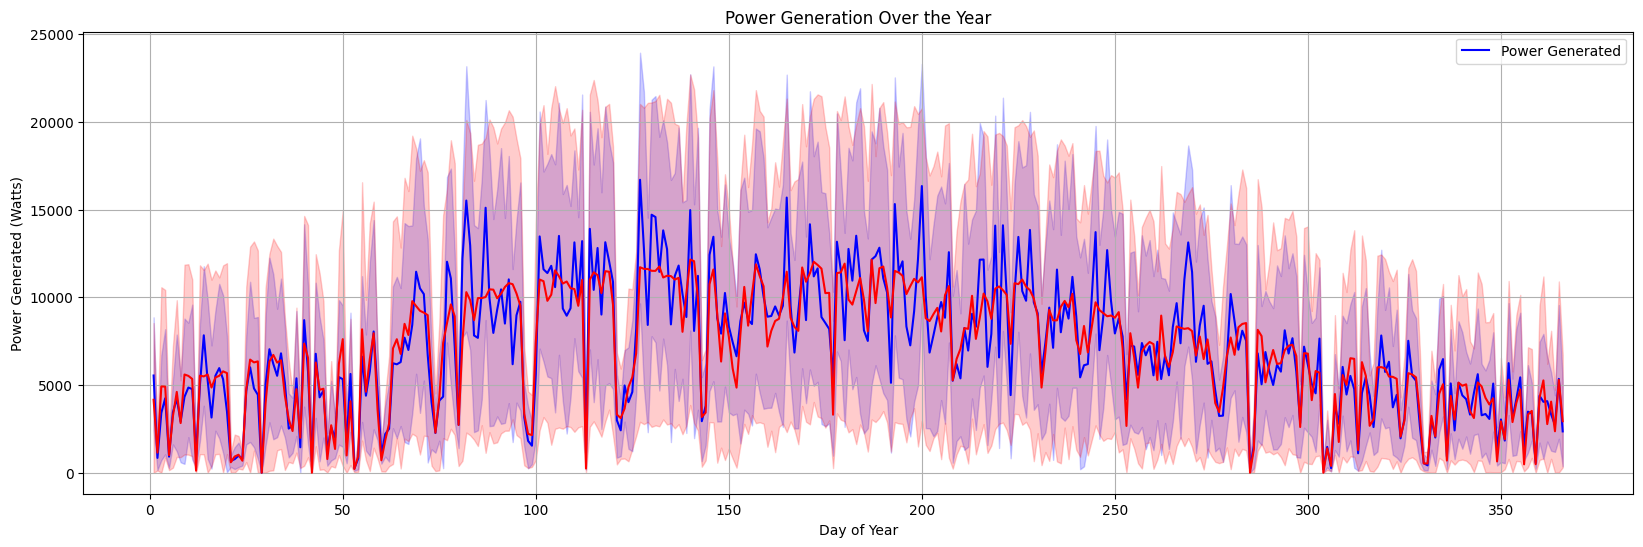

In [56]:
plt.figure(figsize=(20, 6))
sns.lineplot(x=df_sorted["Day of Year"], y=df_sorted["Power Generated"], label="Power Generated", color="blue")
sns.lineplot(x = 'Day of Year', y = 'Power Generated', color = 'red', data = df)

plt.xlabel("Day of Year")
plt.ylabel("Power Generated (Watts)")
plt.title("Power Generation Over the Year")
plt.grid(True)
plt.show()

In [44]:
df_extended['Is Daylight'] = df_extended['Is Daylight'].astype(int)

In [55]:
df_extended.head()

,Day of Year,Year,Month,Day,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
0,245.0,2023.0,9.0,1.0,1.0,0.0,0.859897,69.0,28.0,7.5,0.0,10.0,75.0,8.0,29.82,0.0
1,245.0,2023.0,9.0,1.0,4.0,0.0,0.628535,69.0,28.0,7.5,0.0,10.0,77.0,5.0,29.85,0.0
2,245.0,2023.0,9.0,1.0,7.0,1.0,0.397172,69.0,28.0,7.5,0.0,10.0,70.0,0.0,29.89,5418.0
3,245.0,2023.0,9.0,1.0,10.0,1.0,0.165810,69.0,28.0,7.5,0.0,10.0,33.0,0.0,29.91,25477.0
4,245.0,2023.0,9.0,1.0,13.0,1.0,0.065553,69.0,28.0,7.5,0.0,10.0,21.0,3.0,29.89,30069.0


In [64]:
features = feature_columns + ['Power Generated']
correlation_matrix = df_extended[features].corr()
print(correlation_matrix['Power Generated'].sort_values(ascending=False))

Power Generated                         1.000000
Is Daylight                             0.527872
Average Wind Speed (Period)             0.302400
Average Wind Direction (Day)            0.162963
Average Temperature (Day)               0.160481
Average Wind Speed (Day)                0.159079
First Hour of Period                    0.118316
Visibility                              0.091825
Average Barometric Pressure (Period)   -0.054787
Sky Cover                              -0.193396
Relative Humidity                      -0.560858
Distance to Solar Noon                 -0.724432
Name: Power Generated, dtype: float64


In [58]:
feature_importances = model_extended.feature_importances_
features = X.columns

In [65]:
features_to_drop = ['Day', 'Month', 'Year', 'Day of Year']
feature_importance_df = feature_importance_df[~feature_importance_df['Feature'].isin(features_to_drop)]
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

print(feature_importance_df)

                                 Feature  Importance
6                 Distance to Solar Noon    0.744122
12                     Relative Humidity    0.118061
10                             Sky Cover    0.037883
8           Average Wind Direction (Day)    0.017467
9               Average Wind Speed (Day)    0.013567
7              Average Temperature (Day)    0.010474
14  Average Barometric Pressure (Period)    0.009983
13           Average Wind Speed (Period)    0.008502
4                   First Hour of Period    0.006656
11                            Visibility    0.001113
5                            Is Daylight    0.000059


In [ ]:
Distance to Solar Noon, Relative Humidity 